# OSU Micro Benchmarks (IMB)

Results of selected latency and bandwidth tests from the [OMB suite](http://mvapich.cse.ohio-state.edu/benchmarks/).

Point-to-Point MPI Benchmarks:

- osu_bw: 2x nodes, 1x process per node
- osu_latency: 2x nodes, 1x process per node
- osu_bibw (Bidirectional Bandwidth Test): 2x nodes, 1x process per node
- osu_mbw_mr (Multiple Bandwidth / Message Rate Test): 2x nodes, range of process numbers from 1 per CPU (x a "cpu_factor") down to 1 per node

Collective MPI Benchmarks:

(TODO)


In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Bandwidth/latency vs message size - 2x processes

The plots below show results from most-recent run of each 2x process test for each system/partition/environment combination.

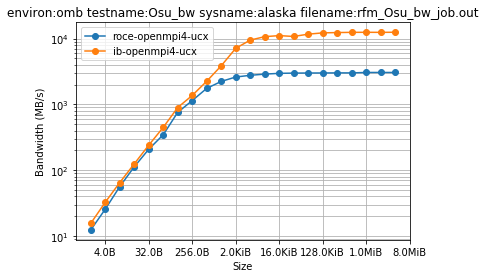

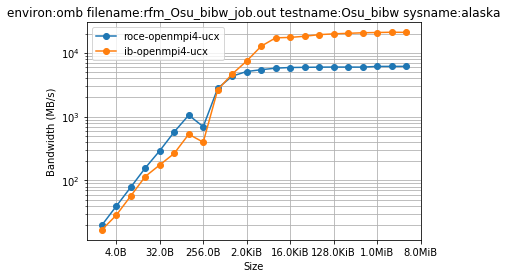

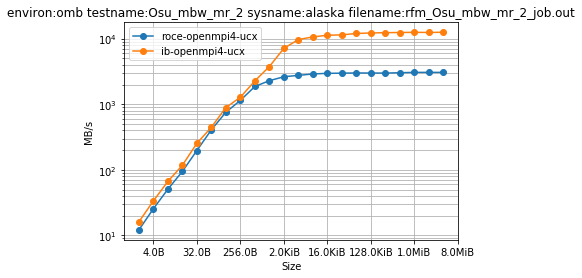

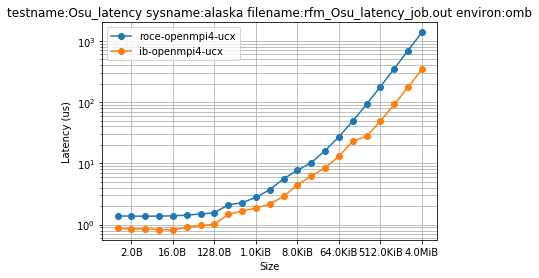

In [2]:
for test in ['Osu_bw', 'Osu_bibw', 'Osu_mbw_mr_2', 'Osu_latency']:
    
    # find all data and work out differences between them:
    paths = modules.utils.find_run_outputs(root='../output', test=test)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    common, meta_diffs = modules.utils.diff_dicts([modules.utils.parse_path_metadata(p) for p in paths], ignore=['path'])
    
    # load and plot:
    for ix, path in enumerate(paths):
        data = modules.omb.read_omb_out(path)
        label = '-'.join(meta_diffs[ix].values())
        plt.plot(data.columns[0], data.columns[1], 'o-', data=data, label=label)
        
    # format plot:
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=10)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
    ax.grid(True, which="both")
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    title = ' '.join(['%s:%s' % (k, v) for (k, v) in common.items()]) # TODO: improve
    ax.set_title(title)
    ax.legend()

# Max Bandwidth & Max Message Rate vs Number of Processes¶

The plots below are for the most-recent test on each system/partition/environment combination. They show the max bandwidth & max message rate vs number of processes for the Multiple Bandwidth / Message Rate `osu_mbr_mr` test

In each case all tests were run on two nodes.

Osu_mbw_mr: max_bandwidth


case,alaska-ib-openmpi4-ucx-omb,alaska-roce-openmpi4-ucx-omb
n_procs,,
2,12523.34,3062.71
4,13152.19,3063.41
8,13158.97,3063.08
16,13202.16,3063.51
32,13214.42,3063.52
64,12574.78,3063.53


Osu_mbw_mr: max_message_rate


case,alaska-ib-openmpi4-ucx-omb,alaska-roce-openmpi4-ucx-omb
n_procs,,
2,8401662.48,6385619.58
4,14624167.46,11893258.01
8,28115624.41,24176140.18
16,59130655.22,32771767.44
32,93772491.25,32803691.73
64,81384039.31,32900240.54


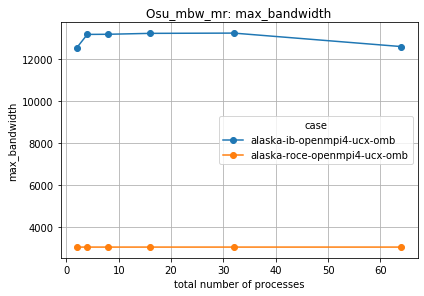

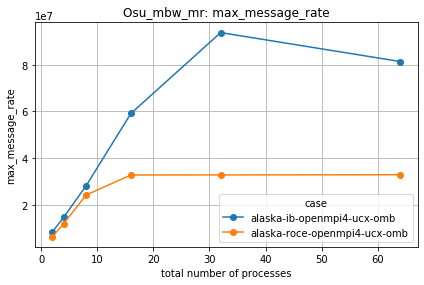

In [3]:
for test in ['Osu_mbw_mr']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    
    # calculate number of processes (=tasks):
    perf_records['n_procs'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    for perf_var in ['max_bandwidth', 'max_message_rate']:
        table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_procs', perf_var)
        ax = table.plot(grid=True, style='o-')
        ax.set_xlabel('total number of processes')
        ax.set_ylabel(perf_var)
        plt.tight_layout()
        title = '%s: %s' % (test, perf_var)
        ax.set_title(title)
        
        print(title)
        display(HTML(table.to_html()))
